In [14]:
#Global Header File

using LinearAlgebra             #   Linear Algebra 
using Kronecker                 #   For Kronecker Product 
using MKL                       #   MKL
using Plots, PyPlot             #   Plot Modules
using Random, Distributions     #   Random RandomMatrices
using RandomMatrices            #   Random Matrtices
using CSV, DelimitedFiles       #   File Management stuff
using DataFrames                #   File Management 
using ITensors
#using ITensorsVisualization     #   Packages for ITensors




dir="e:\\Data\\Vedika\\L8\\";

#Defining the Basic Gates

#The X,Y,Z gates:

X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];

# The Hadamard and the Phase Gates:

H=1/sqrt(2)*[1 1 ; 1 -1];
S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];


#The finite X,Y,Z Rotations:


function RX(r)
    exp(-im*r/2*X)
end


function RY(r)
    exp(-im*r/2*Y)
end


function RZ(r)
    exp(-im*r/2*Z)
end


#The two-body gates:

CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);



L=8;                       #Lenght of the Cirquit



# Constructing the X Kicks 



thetamean=0.0;
thetadev=pi/50;
theta=thetamean+rand(1)[]*thetadev;
                         #Interaction

ordpar=fill(0.1,51)
    
for Itr in 1:100
for i in 1:51

    epsilon=(i-1)*0.02;               #Introducing the Imperfection in kicks
    g=pi*(1-epsilon);
    #XRow=copy(kronecker(X,X,X,X,X,X,X,X,X,X,X,X));
    #XRow=copy(kronecker(RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g)));
    XRow=copy(kronecker(RX(g),L));




    #Constructing the Random Brickwall 


    J=rand(L-1)*pi/2;             #Ising Even Disorder on the two body gates

    fonez=copy(kronecker(Z,Z))
    ftwox=copy(kronecker(X,X));  #For the two body XX+YY gates
    ftwoy=copy(kronecker(Y,Y));

  

    FU=fill(fill(0.1+im, 4,4), L-1);


    for j in 1:length(FU)

        delh=rand(4)*pi/50;          #Imperfection in Z tuning

        int1=kronecker(RZ(delh[1]),RZ(delh[2]));
        int2=exp(-im*J[j]*fonez-im*theta/2*(ftwox+ftwoy));
        int3=kronecker(RZ(delh[3]),RZ(delh[4]));

        FU[j]=int3*int2*int1;
    end


    #This part one have to fix manually for each length
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4]));
    UEven=copy(kronecker(I(2),FU[5],FU[6],FU[7],I(2)));

    #Note this has open boundary condition

    A=XRow*UEven*UOdd;



    # Computing the Eigenstatistics     
    
    EigA=eigvals(A);
    EigvecsA=eigvecs(A);




    N=fill(0.1,length(EigA))
    N=angle.(EigA);

    N= sort(N,rev=true);


    EigA1=copy(N);
    ls = deleteat!(EigA1,1);
    la = deleteat!(N,length(N));
    m=copy(la-ls)/mean(la-ls)


    #Computing the order Parameter

    n=fill(0.1,length(EigA)-2);

    for i in 1:length(n)
        #n[i]=m[i+1]/m[i];
        n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);

    end
    #Print Statements:

    CSV.write(dir*"U\\U_theta_$(thetamean)_g_"*first("$(epsilon)",4)*"_Itr_$Itr.csv", Tables.table(A), writeheader=false);
    CSV.write(dir*"Eigstat\\m_theta_$(thetamean)_g_"*first("$(epsilon)",4)*"_Itr_$Itr.csv", Tables.table(m), writeheader=false);
    CSV.write(dir*"Eigstat\\n_theta_$(thetamean)_g_"*first("$(epsilon)",4)*"_Itr_$Itr.csv", Tables.table(n), writeheader=false);
    CSV.write(dir*"Eigval\\Eigvec_theta_$(thetamean)_g_"*first("$(epsilon)",4)*"_Itr_$Itr.csv", Tables.table(EigvecsA), writeheader=false);
    CSV.write(dir*"Eigval\\Eigval_theta_$(thetamean)_g_"*first("$(epsilon)",4)*"_Itr_$Itr.csv", Tables.table(EigA), writeheader=false);


    ordpar[i]=mean(n);


end


CSV.write(dir*"Ordpar_theta_$(thetamean)_Itr_$Itr.csv", Tables.table(ordpar), writeheader=false);
end

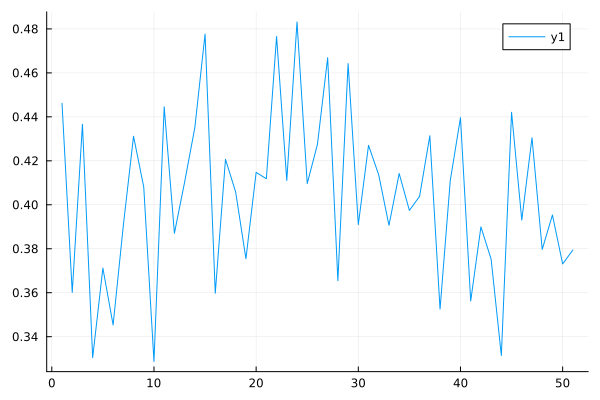

In [15]:
xax=1:51
Plots.plot(xax,ordpar)